In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun  2 11:09:55 2018

@author: Marcelo
"""

import numpy as np
import numpy.ma as ma  # masked array
from machine_selection import set_screen_size_by_machine

# 2019-03-15
# https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
import pandas as pd
import csv

# 2019-11-06
import time

# 2019-11-03
from filebatch_class import (FileBatch)

# 2019-03-09
from teste_datas import (Spec)

# 2019-09-16
from gauss_funcs import gaus_fw, gaus_sig

# 2019-07-15
# https://docs.scipy.org/doc/numpy/reference/routines.polynomials.classes.html#basics
from numpy.polynomial import Polynomial as P
from numpy.polynomial.polynomial import (polyfit, polyval)

from scipy.signal import (cwt, ricker, find_peaks, find_peaks_cwt, peak_widths)
from scipy.ndimage import label, generate_binary_structure, find_objects  # 2019-09-18

from scipy.optimize import (curve_fit, root, lsq_linear)
from scipy.stats import (iqr)
from scipy.special import (expit)
import base_line_funcs as blf
import spectra_regions_funcs as spreg

# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-errorbars
import matplotlib.pyplot as plt
plt.close('all')

# frm spectra_regions_funcs import (total_analysis2)
import csv
import pickle
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh import palettes

In [2]:
# https://stackoverflow.com/questions/17098654/how-to-store-a-dataframe-using-pandas
dfSpecFiles = pd.read_pickle('todos_si_specs.pkl')
# dfSpecFiles = pd.read_pickle('todos_si2019_specs.pkl')
dfSpecFiles

,IdSpec,FName,StTime,LvTime
0,0,../Genie_Transfer/Si/BGNOVO.Chn,2013-12-13 15:27:02,237389.66
1,1,../Genie_Transfer/Si/si2016/SI14816.Chn,2016-12-21 15:33:47,50000.00
2,2,../Genie_Transfer/Si/si2016/SI08216.Chn,2016-06-29 16:29:37,50000.00
3,3,../Genie_Transfer/Si/si2016/SI14416.Chn,2016-12-08 19:32:14,50000.00
4,4,../Genie_Transfer/Si/si2016/SI09416.Chn,2016-07-26 15:21:10,50000.00
...,...,...,...,...
1093,1093,../Genie_Transfer/Si/Si2006/si12606.Chn,2006-09-25 16:19:09,50000.00
1094,1094,../Genie_Transfer/Si/Si2006/SI12206.Chn,2006-09-04 16:19:13,50000.00
1095,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00
1096,1096,../Genie_Transfer/Si/Si2006/SI07906.Chn,2006-06-05 15:26:05,50000.00


In [3]:
# https://stackoverflow.com/questions/17098654/how-to-store-a-dataframe-using-pandas
dfPeakInfo = pd.read_pickle('todos_si_peaks.pkl')
# dfPeakInfo = pd.read_pickle('todos_si2019_peaks.pkl')
dfPeakInfo

,IdSpec_2,Centr,Fwhm,Area,SArea
0,0,40.553747,4.648199,3815.384906,103.438491
1,0,46.086864,4.285058,2682.249310,124.655743
2,0,94.958163,3.740347,3441.258574,171.046572
3,0,106.967747,2.469356,1512.384738,162.374074
4,0,115.714642,2.106215,2142.793388,159.754004
...,...,...,...,...,...
59045,1097,2208.983539,5.556050,117.731428,62.049194
59046,1097,2314.983583,6.645472,140.957080,65.033515
59047,1097,2273.959508,4.829769,60.258412,63.392232
59048,1097,2854.884221,7.371753,327.031536,76.470880


In [4]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
# https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
    
#df4 = df3
#df4[df2sB['Centr'] >= 355) & (df2sB['Centr'] <= 395) 'EnergyLbl'] = 'Unassigned'
#df4

In [7]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
dfPeakInfo['IdEnergy']=''
dfPeakInfo.reset_index(drop=True)
dfPeakInfo['IdPeak'] = list(range(len(dfPeakInfo.index)))
dfPeakInfo
# dfPeakInfo.set_index('IdPeak')

,IdSpec_2,Centr,Fwhm,Area,SArea,IdEnergy,IdPeak
0,0,40.553747,4.648199,3815.384906,103.438491,,0
1,0,46.086864,4.285058,2682.249310,124.655743,,1
2,0,94.958163,3.740347,3441.258574,171.046572,,2
3,0,106.967747,2.469356,1512.384738,162.374074,,3
4,0,115.714642,2.106215,2142.793388,159.754004,,4
...,...,...,...,...,...,...,...
59045,1097,2208.983539,5.556050,117.731428,62.049194,,59045
59046,1097,2314.983583,6.645472,140.957080,65.033515,,59046
59047,1097,2273.959508,4.829769,60.258412,63.392232,,59047
59048,1097,2854.884221,7.371753,327.031536,76.470880,,59048


In [11]:
# 2020-02-18 Testes
# dfgrrr = dfPeakInfo.loc[ dfPeakInfo['IdEnergy']!='']
# dfgrrr = dfgrrr.loc[dfgrrr.groupby(['IdSpec_2','IdEnergy'])['Area'].idxmax()]

# pd.options.display.max_rows=1000
# dfgrrr
dfTest1 = dfPeakInfo.loc[ dfPeakInfo.groupby(['IdSpec_2'])['Area'].idxmax()]
dfTest1

,IdSpec_2,Centr,Fwhm,Area,SArea,IdEnergy,IdPeak
57,0,45.201267,7.371753,9475.770119,146.072346,,57
84,1,1310.987495,2.832496,34687.924145,195.111715,,84
124,2,1310.033622,2.832496,50862.425454,240.440496,,124
188,3,1310.224828,3.014066,45866.523534,223.959172,,188
233,4,1310.724369,2.469356,51306.654627,238.271542,,233
...,...,...,...,...,...,...,...
58733,1093,1335.746663,2.469356,67035.914985,274.581380,,58733
58793,1094,1557.656873,2.469356,66240.046449,267.432510,,58793
58866,1095,1559.061309,2.832496,71654.337344,276.569590,,58866
58905,1096,96.627551,2.287785,119503.345159,488.188056,,58905


In [10]:
dfCorrGammasByMaxArea = dfgrrr.copy()
dfCorrGammasByMaxArea

,IdSpec_2,Centr,Fwhm,Area,SArea,IdEnergy,IdPeak,Energy
10,0,403.965030,2.469356,771.443452,100.226953,keV0320,10,320.08
21,0,906.951425,2.106215,148.930114,54.826263,keV0810,21,810.78
31,0,1318.038066,3.195637,116.898530,43.601061,keV1173,31,1173.24
33,0,1495.918539,2.832496,153.727948,36.481836,keV1332,33,1332.50
52,0,2923.003178,3.921918,836.962662,33.321879,keV2615,52,2614.70
69,1,361.055070,2.650926,4896.258280,160.908012,keV0320,69,320.08
...,...,...,...,...,...,...,...,...
58965,1096,2971.977901,3.014066,3113.611417,72.771305,keV2615,58965,2614.70
58982,1097,365.898209,2.287785,3456.030762,204.049377,keV0320,58982,320.08
58996,1097,923.047750,2.287785,4129.095062,133.386995,keV0810,58996,810.78


In [11]:
# dfCorrGammasByMaxArea
gbA = dfCorrGammasByMaxArea.groupby(['IdSpec_2']).Centr
gbB = dfCorrGammasByMaxArea.groupby(['IdSpec_2']).Energy
dfA = pd.concat([gbA.apply(list), gbB.apply(list)], axis=1, keys=['centrs','engys'])
dfA

,centrs,engys
IdSpec_2,,
0,"[403.965029619721, 906.9514248704663, 1318.038...","[320.08, 810.78, 1173.24, 1332.5, 2614.7]"
1,"[361.0550704709522, 907.4810699588477, 1310.98...","[320.08, 810.78, 1173.24, 1332.5, 2614.7]"
2,"[360.7120114438651, 906.5523323276863, 1310.03...","[320.08, 810.78, 1173.24, 1332.5]"
3,"[360.8029610556807, 906.6631578947369, 1310.22...","[320.08, 810.78, 1173.24, 2614.7]"
4,"[360.98933649289097, 907.0966613208923, 1310.7...","[320.08, 810.78, 1173.24, 1332.5, 2614.7]"
5,"[360.87831972338705, 906.993432137822, 1310.57...","[320.08, 810.78, 1173.24, 2614.7]"
...,...,...
1092,"[904.9833333333333, 2971.1724137931033]","[810.78, 2614.7]"
1093,"[387.9823669901926, 951.9055918125185, 1335.74...","[320.08, 810.78, 1173.24, 1332.5, 2614.7]"


In [12]:
def engyChanCal(row):
    chs = row.centrs
    ens = row.engys
    return polyfit(chs,ens,2)

In [13]:
def calibCentr(row):
    centr = row.Centr
    enParms = np.flip(row.enCal)
    return np.polyval(enParms,centr)

In [14]:
# https://stackoverflow.com/questions/40353519/how-to-apply-custom-function-to-pandas-data-frame-for-each-row
dfEnergyCal = pd.DataFrame(dfA)
dfEnergyCal['enCal'] = dfEnergyCal.apply(engyChanCal,axis=1)
dfEnergyCal = dfEnergyCal[['enCal']]
dfEnergyCal
# dfEnergyCal = dfEnergyCal.loc[{'enCal'}]

C:\Users\mmaduar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: The fit may be poorly conditioned
  after removing the cwd from sys.path.


,enCal
IdSpec_2,
0,"[-57.17672462008734, 0.9538163353114207, -1.37..."
1,"[-4.171866809987164, 0.8980399412858704, 2.870..."
2,"[-32.76172419272835, 0.9973489290762081, -6.52..."
3,"[-4.2269476430002175, 0.899007394415239, -2.16..."
4,"[-4.162396923425624, 0.8983212975394602, -2.40..."
5,"[-4.123513684767678, 0.8984403539551973, -3.97..."
...,...
1092,"[388.24043806430143, 0.34319074418186996, 0.00..."
1093,"[-35.89176421934577, 0.9080680384523808, -5.33..."


In [15]:
# 2019-11-11
# Fazer JOIN com DataFrames:
# - df2sB: Lista de picos IdPeak por espectro IdSpec
# - dfEnCal: Par^ametros de calibra,c~ao canal x energia por espectro IdSpec 

# https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

dfMergePeaks = pd.merge(dfPeakInfo, dfEnergyCal, on='IdSpec_2') \
    [['IdPeak','IdSpec_2','Centr','Fwhm','Area','SArea','enCal']]
dfMergePeaks['fitEngy'] = dfMergePeaks.apply(calibCentr,axis=1)
dfMergePeaks

,IdPeak,IdSpec_2,Centr,Fwhm,Area,SArea,enCal,fitEngy
0,0,0,40.553747,4.648199,3815.384906,103.438491,"[-57.17672462008734, 0.9538163353114207, -1.37...",-18.518451
1,1,0,46.086864,4.285058,2682.249310,124.655743,"[-57.17672462008734, 0.9538163353114207, -1.37...",-13.247448
2,2,0,94.958163,3.740347,3441.258574,171.046572,"[-57.17672462008734, 0.9538163353114207, -1.37...",33.272268
3,3,0,106.967747,2.469356,1512.384738,162.374074,"[-57.17672462008734, 0.9538163353114207, -1.37...",44.693949
4,4,0,115.714642,2.106215,2142.793388,159.754004,"[-57.17672462008734, 0.9538163353114207, -1.37...",53.010170
5,5,0,218.945377,2.469356,1690.461201,145.605823,"[-57.17672462008734, 0.9538163353114207, -1.37...",150.999570
...,...,...,...,...,...,...,...,...
58996,59044,1097,2224.043052,3.014066,46.168849,61.391630,"[-2.3660485397733795, 0.8811145008187856, -1.2...",1957.264498
58997,59045,1097,2208.983539,5.556050,117.731428,62.049194,"[-2.3660485397733795, 0.8811145008187856, -1.2...",1943.995425
58998,59046,1097,2314.983583,6.645472,140.957080,65.033515,"[-2.3660485397733795, 0.8811145008187856, -1.2...",2037.393015


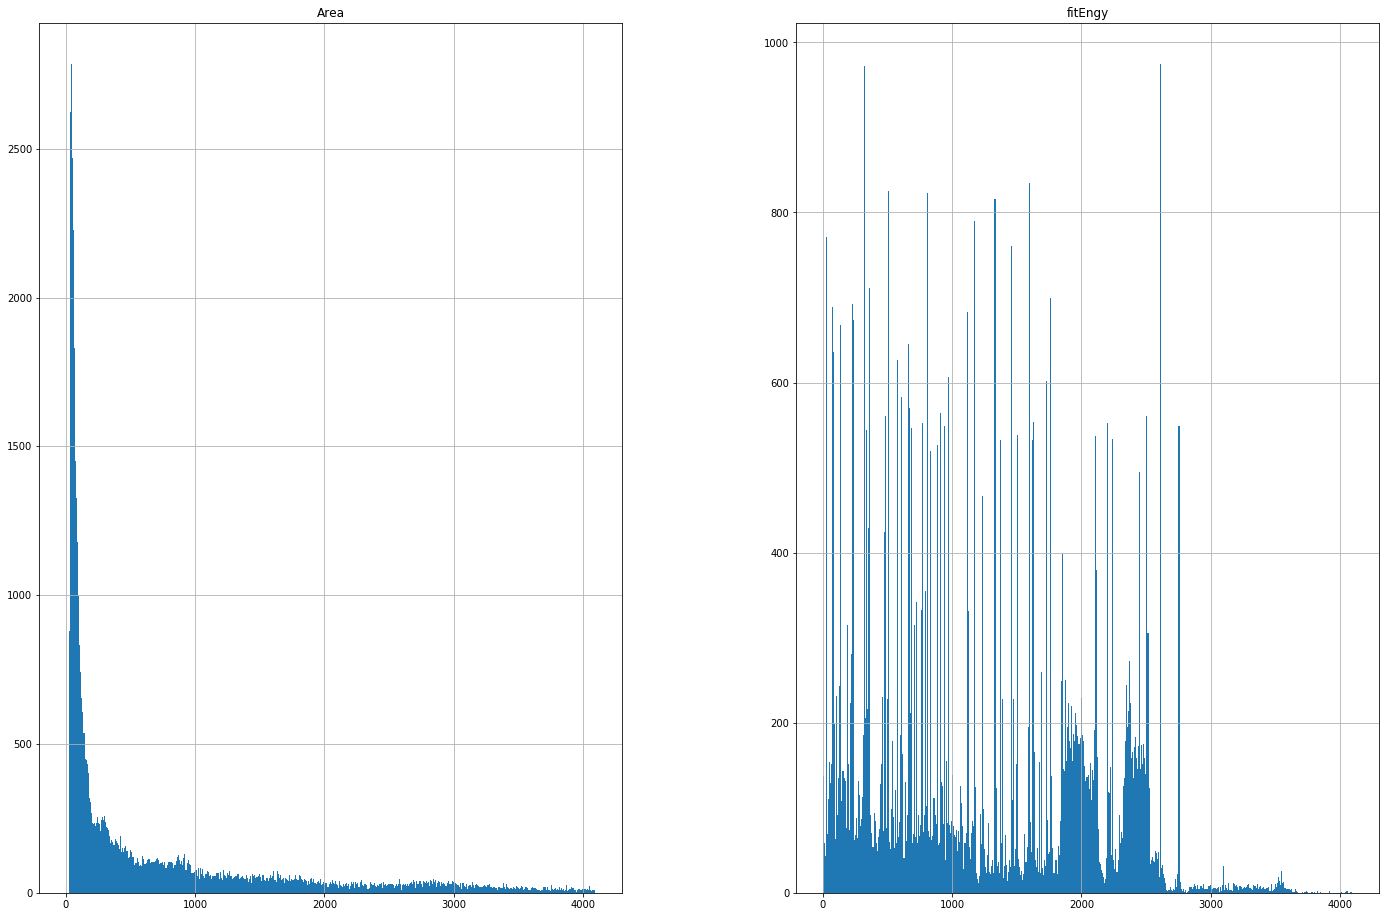

In [16]:
# https://mode.com/example-gallery/python_histogram/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

frameB = pd.DataFrame(dfMergePeaks, columns=['fitEngy','Area'])

histo1 = frameB.hist(bins=np.linspace(0,4095,num=513),figsize=(24,16))

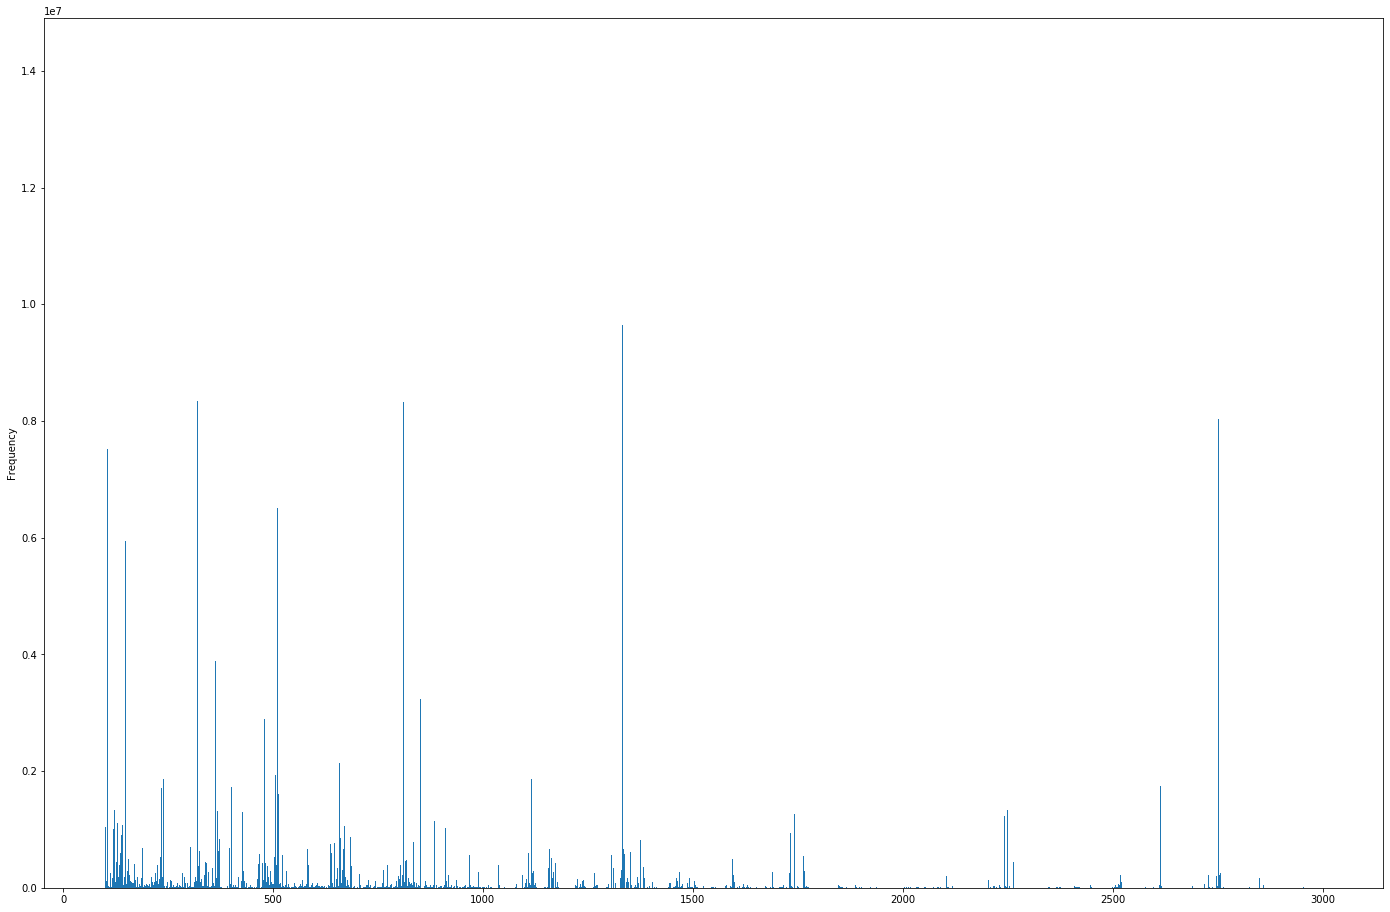

In [17]:
histo2 = frameB['fitEngy'].plot(kind="hist", weights=frameB['Area'], bins=np.linspace(100,3000,num=1501),figsize=(24,16))

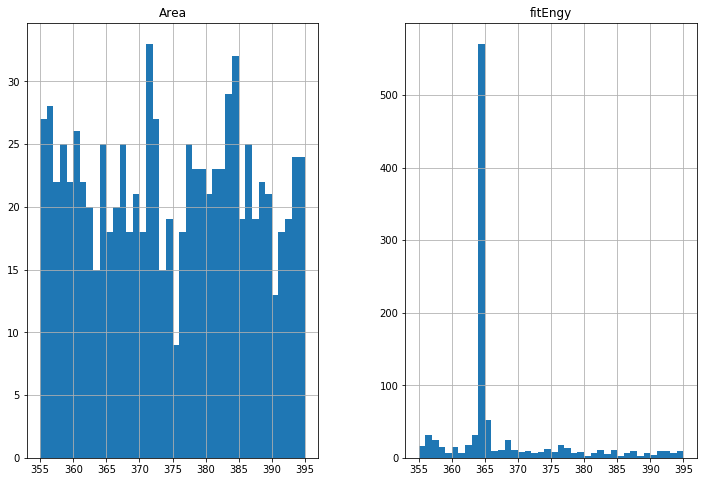

In [18]:
# https://mode.com/example-gallery/python_histogram/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
histo1 = frameB.hist(bins=np.linspace(355,395,num=41),figsize=(12,8))

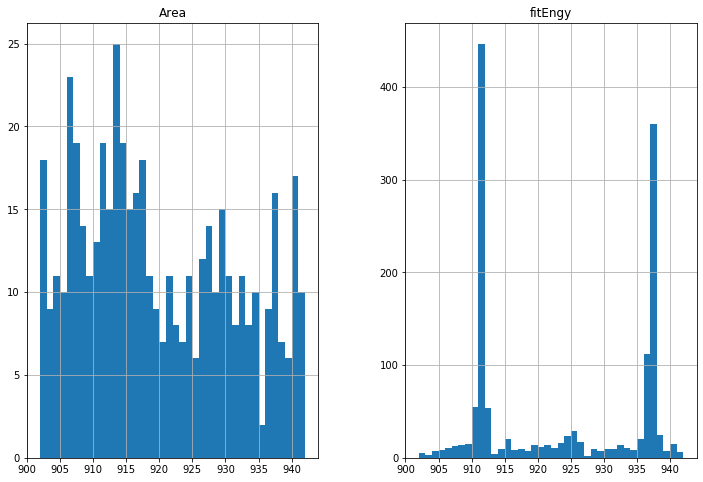

In [19]:
# https://mode.com/example-gallery/python_histogram/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
histo1 = frameB.hist(bins=np.linspace(902,942,num=41),figsize=(12,8))

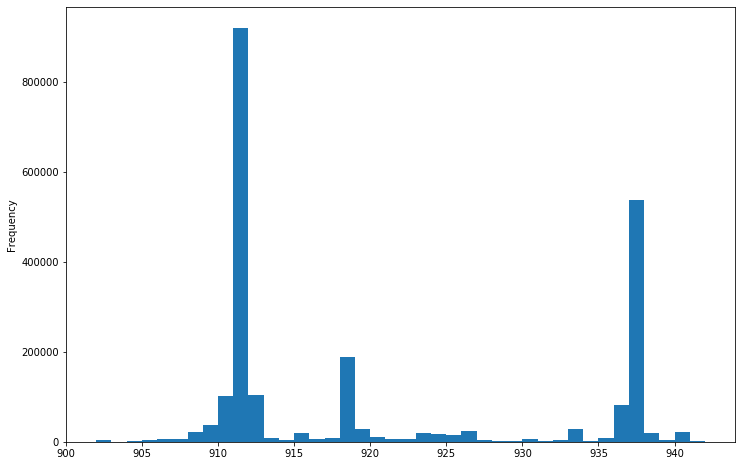

In [20]:
histo2 = frameB['fitEngy'].plot(kind="hist", weights=frameB['Area'], bins=np.linspace(902,942,num=41),figsize=(12,8))

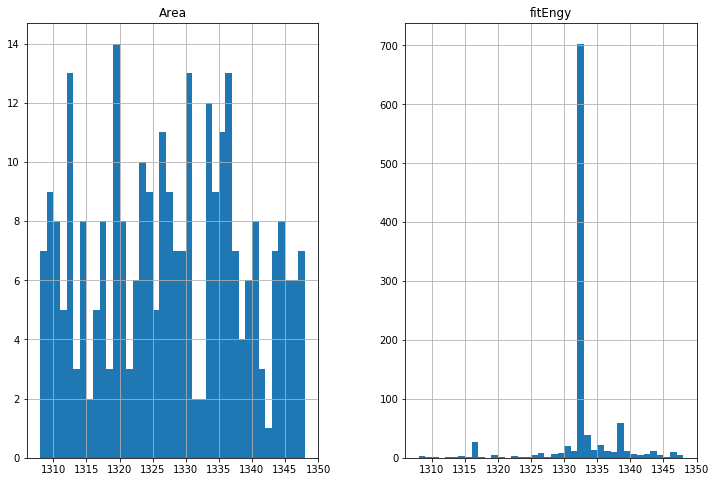

In [21]:
# https://mode.com/example-gallery/python_histogram/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
histo1 = frameB.hist(bins=np.linspace(1308,1348,num=41),figsize=(12,8))

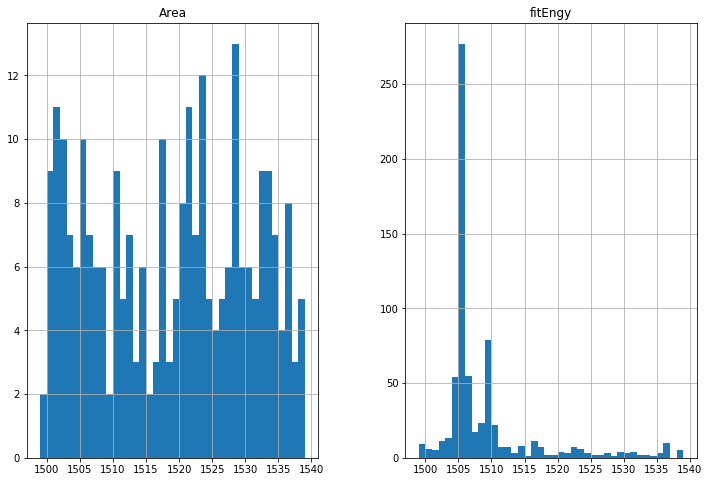

In [22]:
# https://mode.com/example-gallery/python_histogram/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
histo1 = frameB.hist(bins=np.linspace(1499,1539,num=41),figsize=(12,8))

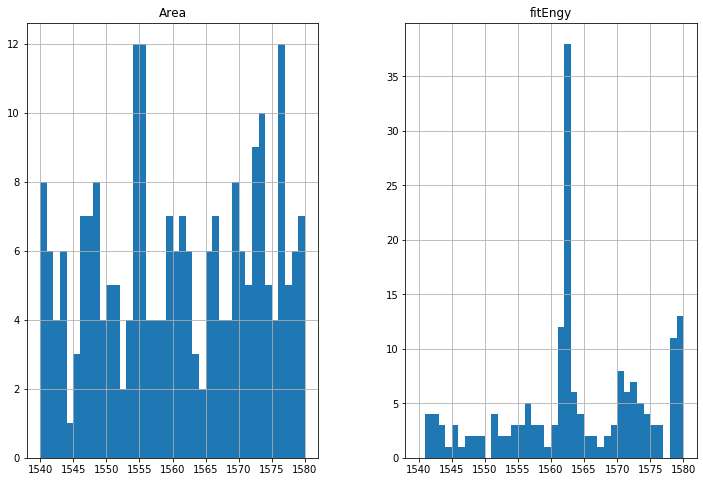

In [23]:
# https://mode.com/example-gallery/python_histogram/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
histo1 = frameB.hist(bins=np.linspace(1540,1580,num=41),figsize=(12,8))

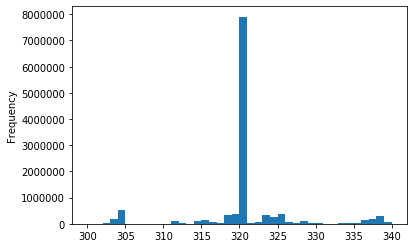

In [24]:
histo2 = frameB['fitEngy'].plot(kind="hist", weights=frameB['Area'], bins=np.linspace(300,340,num=41),figsize=(6,4))

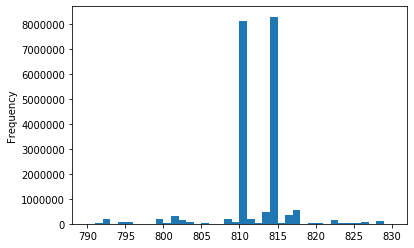

In [25]:
histo2 = frameB['fitEngy'].plot(kind="hist", weights=frameB['Area'], bins=np.linspace(790,830,num=41),figsize=(6,4))

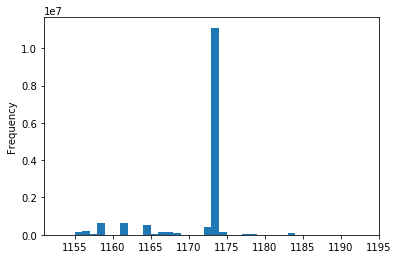

In [26]:
histo2 = frameB['fitEngy'].plot(kind="hist", weights=frameB['Area'], bins=np.linspace(1153,1193,num=41),figsize=(6,4))

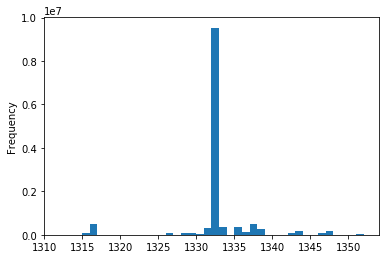

In [27]:
histo2 = frameB['fitEngy'].plot(kind="hist", weights=frameB['Area'], bins=np.linspace(1312,1352,num=41),figsize=(6,4))

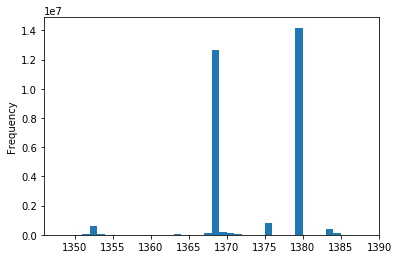

In [28]:
histo2 = frameB['fitEngy'].plot(kind="hist", weights=frameB['Area'], bins=np.linspace(1348,1388,num=41),figsize=(6,4))

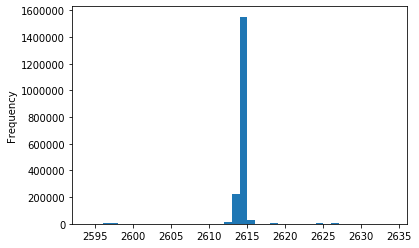

In [29]:
histo2 = frameB['fitEngy'].plot(kind="hist", weights=frameB['Area'], bins=np.linspace(2594,2634,num=41),figsize=(6,4))

In [30]:
efficFile='F850D3E_(2014)_eff.csv'

In [31]:
efficF850D3Epercent = pd.read_csv(efficFile)
efficF850D3E = efficF850D3Epercent.copy()
efficF850D3E['Effic'] = efficF850D3Epercent['Effic']*0.01
efficF850D3Epercent

,EnkeV,Effic,Sigma
0,59.54,0.2160,3.70
1,81.00,0.6550,2.93
2,88.03,0.7701,3.27
3,122.06,1.1633,2.22
4,136.47,1.2452,3.18
5,165.86,1.1994,2.44
...,...,...,...
10,604.69,0.3100,90.00
11,795.84,0.3082,2.53
12,898.04,0.2754,2.74


In [32]:
efficF850D3E

,EnkeV,Effic,Sigma
0,59.54,0.002160,3.70
1,81.00,0.006550,2.93
2,88.03,0.007701,3.27
3,122.06,0.011633,2.22
4,136.47,0.012452,3.18
5,165.86,0.011994,2.44
...,...,...,...
10,604.69,0.003100,90.00
11,795.84,0.003082,2.53
12,898.04,0.002754,2.74


In [33]:
nucBibGen = pd.read_csv('Pisciro-Nuc_(2019).csv')
nucBibGen

,Nucl,T12s
0,Ag-110m,21580000.0
1,Ba-140,1102000.0
2,Co-58,6127000.0
3,Co-60,166300000.0
4,Cr-51,2394000.0
5,Cs-137,946700000.0
...,...,...
9,Na-24,54070.0
10,Np-239,203500.0
11,Ru-103,3392000.0


In [34]:
nucBibGam = pd.read_csv('Pisciro-Eng_(2019).csv')

In [35]:
nucBibGam['IdEngy'] = list(range(len(nucBibGam)))
# Macete para fazer merge total com dfFoundPeaks:
nucBibGam['IdComm'] = True 
nucBibGam

,Nucl,Engy,sEngy,Yie,sYie,IdEngy,IdComm
0,Ag-110m,446.811,0.003,3.750,0.030,0,True
1,Ag-110m,620.360,0.003,2.806,0.018,1,True
2,Ag-110m,657.762,0.002,94.600,0.400,2,True
3,Ag-110m,677.723,0.002,10.350,0.080,3,True
4,Ag-110m,687.015,0.003,6.440,0.060,4,True
5,Ag-110m,706.682,0.003,16.440,0.100,5,True
...,...,...,...,...,...,...,...
43,W-187,134.247,0.007,8.800,0.300,43,True
44,W-187,479.550,0.022,21.800,0.800,44,True
45,W-187,618.260,0.040,6.280,0.220,45,True


In [36]:
# https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html
# tips[['total_bill', 'tip', 'smoker', 'time']].head(5)

In [37]:
dfMergePeaks

,IdPeak,IdSpec_2,Centr,Fwhm,Area,SArea,enCal,fitEngy
0,0,0,40.553747,4.648199,3815.384906,103.438491,"[-57.17672462008734, 0.9538163353114207, -1.37...",-18.518451
1,1,0,46.086864,4.285058,2682.249310,124.655743,"[-57.17672462008734, 0.9538163353114207, -1.37...",-13.247448
2,2,0,94.958163,3.740347,3441.258574,171.046572,"[-57.17672462008734, 0.9538163353114207, -1.37...",33.272268
3,3,0,106.967747,2.469356,1512.384738,162.374074,"[-57.17672462008734, 0.9538163353114207, -1.37...",44.693949
4,4,0,115.714642,2.106215,2142.793388,159.754004,"[-57.17672462008734, 0.9538163353114207, -1.37...",53.010170
5,5,0,218.945377,2.469356,1690.461201,145.605823,"[-57.17672462008734, 0.9538163353114207, -1.37...",150.999570
...,...,...,...,...,...,...,...,...
58996,59044,1097,2224.043052,3.014066,46.168849,61.391630,"[-2.3660485397733795, 0.8811145008187856, -1.2...",1957.264498
58997,59045,1097,2208.983539,5.556050,117.731428,62.049194,"[-2.3660485397733795, 0.8811145008187856, -1.2...",1943.995425
58998,59046,1097,2314.983583,6.645472,140.957080,65.033515,"[-2.3660485397733795, 0.8811145008187856, -1.2...",2037.393015


In [38]:
dfAux = pd.DataFrame(dfMergePeaks[['IdPeak','IdSpec_2','Fwhm','Area','SArea','fitEngy']])
dfAux = dfAux[dfAux['fitEngy'] >= 20.0]
# dfAux = dfAux.set_index('IdPeak')
dfAux['IdComm']=True
dfFoundPeaks = dfAux.copy()
dfFoundPeaks

,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,IdComm
2,2,0,3.740347,3441.258574,171.046572,33.272268,True
3,3,0,2.469356,1512.384738,162.374074,44.693949,True
4,4,0,2.106215,2142.793388,159.754004,53.010170,True
5,5,0,2.469356,1690.461201,145.605823,150.999570,True
6,6,0,2.106215,310.045683,137.922048,164.258810,True
7,7,0,2.650926,1400.997954,131.056813,206.913130,True
...,...,...,...,...,...,...,...
58996,59044,1097,3.014066,46.168849,61.391630,1957.264498,True
58997,59045,1097,5.556050,117.731428,62.049194,1943.995425,True
58998,59046,1097,6.645472,140.957080,65.033515,2037.393015,True


In [39]:
nucBibGam

,Nucl,Engy,sEngy,Yie,sYie,IdEngy,IdComm
0,Ag-110m,446.811,0.003,3.750,0.030,0,True
1,Ag-110m,620.360,0.003,2.806,0.018,1,True
2,Ag-110m,657.762,0.002,94.600,0.400,2,True
3,Ag-110m,677.723,0.002,10.350,0.080,3,True
4,Ag-110m,687.015,0.003,6.440,0.060,4,True
5,Ag-110m,706.682,0.003,16.440,0.100,5,True
...,...,...,...,...,...,...,...
43,W-187,134.247,0.007,8.800,0.300,43,True
44,W-187,479.550,0.022,21.800,0.800,44,True
45,W-187,618.260,0.040,6.280,0.220,45,True


In [40]:
# FINALMENTE!!!!!!! 2019-11-13
dfAll = pd.merge(dfFoundPeaks,nucBibGam,on='IdComm')
# dfIdentifiedPeaks = dfAll['']
dfAll.describe()

,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,Engy,sEngy,Yie,sYie,IdEngy
count,2.872968e+06,2.872968e+06,2.872968e+06,2.872968e+06,2.872968e+06,2.872968e+06,2.872968e+06,2.872968e+06,2.872968e+06,2.872968e+06,2.872968e+06
mean,2.951069e+04,5.366939e+02,3.313797e+00,8.689170e+03,1.033619e+02,1.252509e+03,8.357007e+02,1.381633e-02,3.447443e+01,2.752857e-01,2.400000e+01
std,1.704040e+04,3.159973e+02,1.466614e+00,7.012429e+05,1.237785e+02,8.342329e+02,5.459883e+02,1.770700e-02,3.682590e+01,4.945728e-01,1.414214e+01
min,2.000000e+00,0.000000e+00,2.106215e+00,2.786491e+01,5.767843e+00,2.033351e+01,1.061230e+02,1.000000e-03,5.180000e-01,1.000000e-03,0.000000e+00
25%,1.474675e+04,2.610000e+02,2.287785e+00,8.224052e+01,4.065039e+01,5.109902e+02,4.870210e+02,3.000000e-03,6.060000e+00,3.000000e-02,1.200000e+01
50%,2.947050e+04,5.140000e+02,2.832496e+00,4.109282e+02,7.347861e+01,1.125172e+03,7.066820e+02,6.000000e-03,1.644000e+01,9.000000e-02,2.400000e+01
75%,4.425925e+04,8.000000e+02,3.740347e+00,2.091685e+03,1.336349e+02,1.952161e+03,9.374930e+02,1.900000e-02,7.270000e+01,3.000000e-01,3.600000e+01
max,5.904900e+04,1.097000e+03,7.371753e+00,1.644327e+08,1.406302e+04,1.054325e+04,2.754050e+03,8.000000e-02,1.000000e+02,3.000000e+00,4.800000e+01


In [41]:
dfAll

,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,IdComm,Nucl,Engy,sEngy,Yie,sYie,IdEngy
0,2,0,3.740347,3441.258574,171.046572,33.272268,True,Ag-110m,446.811,0.003,3.750,0.030,0
1,2,0,3.740347,3441.258574,171.046572,33.272268,True,Ag-110m,620.360,0.003,2.806,0.018,1
2,2,0,3.740347,3441.258574,171.046572,33.272268,True,Ag-110m,657.762,0.002,94.600,0.400,2
3,2,0,3.740347,3441.258574,171.046572,33.272268,True,Ag-110m,677.723,0.002,10.350,0.080,3
4,2,0,3.740347,3441.258574,171.046572,33.272268,True,Ag-110m,687.015,0.003,6.440,0.060,4
5,2,0,3.740347,3441.258574,171.046572,33.272268,True,Ag-110m,706.682,0.003,16.440,0.100,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872962,59049,1097,7.371753,82.057917,63.140692,1980.107638,True,W-187,134.247,0.007,8.800,0.300,43
2872963,59049,1097,7.371753,82.057917,63.140692,1980.107638,True,W-187,479.550,0.022,21.800,0.800,44
2872964,59049,1097,7.371753,82.057917,63.140692,1980.107638,True,W-187,618.260,0.040,6.280,0.220,45


In [42]:
dfIdentifiedPeaks = pd.DataFrame(dfAll[np.abs(dfAll['fitEngy']-dfAll['Engy'])<0.6])
del dfAll
dfIdentifiedPeaks

,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,IdComm,Nucl,Engy,sEngy,Yie,sYie,IdEngy
2741,58,0,7.371753,211.509135,61.272868,685.830776,True,W-187,685.730,0.040,27.300,1.000,46
3255,69,1,2.650926,4896.258280,160.908012,320.073750,True,Cr-51,320.084,0.001,10.080,0.230,21
3356,71,1,2.106215,394.665269,136.436323,364.860235,True,I-131,364.480,0.011,81.200,1.200,24
3550,75,1,2.106215,13308.430059,154.768862,661.406404,True,Cs-137,661.660,0.003,85.210,0.070,22
3582,76,1,2.106215,462.110336,96.203350,707.110997,True,Ag-110m,706.682,0.003,16.440,0.100,5
3643,77,1,2.106215,18346.168050,166.261924,810.806020,True,Co-58,810.775,0.009,99.448,0.008,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870339,58996,1097,2.287785,4129.095062,133.386995,810.943669,True,Co-58,810.775,0.009,99.448,0.008,17
2870733,59004,1097,3.014066,2736.891181,121.666110,1173.055263,True,Co-60,1173.237,0.004,99.900,0.020,19
2870832,59006,1097,2.650926,2348.637582,86.734983,1332.563361,True,Co-60,1332.501,0.005,99.982,0.001,20


In [43]:
# 2019-11-24 Espectros com Co-60 e Cr-51
dfIdentifiedPeaks[dfIdentifiedPeaks['Nucl'].isin(['Co-60','Cr-51'])]

,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,IdComm,Nucl,Engy,sEngy,Yie,sYie,IdEngy
3255,69,1,2.650926,4896.258280,160.908012,320.073750,True,Cr-51,320.084,0.001,10.080,0.230,21
3988,84,1,2.832496,34687.924145,195.111715,1173.196603,True,Co-60,1173.237,0.004,99.900,0.020,19
4038,85,1,3.195637,32363.849573,182.117977,1332.523368,True,Co-60,1332.501,0.005,99.982,0.001,20
8155,170,3,2.106215,3761.646920,168.532647,320.109407,True,Cr-51,320.084,0.001,10.080,0.230,21
9035,188,3,3.014066,45866.523534,223.959172,1173.303305,True,Co-60,1173.237,0.004,99.900,0.020,19
9085,189,3,2.469356,36888.294792,195.262139,1332.694790,True,Co-60,1332.501,0.005,99.982,0.001,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866178,58911,1096,2.106215,11594.192012,226.042221,320.031249,True,Cr-51,320.084,0.001,10.080,0.230,21
2867205,58932,1096,3.014066,2835.328664,119.061420,1173.054133,True,Co-60,1173.237,0.004,99.900,0.020,19
2867304,58934,1096,2.832496,2566.566060,91.404492,1332.562996,True,Co-60,1332.501,0.005,99.982,0.001,20


In [44]:
dfSpecFiles

,IdSpec,FName,StTime,LvTime
0,0,../Genie_Transfer/Si/BGNOVO.Chn,2013-12-13 15:27:02,237389.66
1,1,../Genie_Transfer/Si/si2016/SI14816.Chn,2016-12-21 15:33:47,50000.00
2,2,../Genie_Transfer/Si/si2016/SI08216.Chn,2016-06-29 16:29:37,50000.00
3,3,../Genie_Transfer/Si/si2016/SI14416.Chn,2016-12-08 19:32:14,50000.00
4,4,../Genie_Transfer/Si/si2016/SI09416.Chn,2016-07-26 15:21:10,50000.00
5,5,../Genie_Transfer/Si/si2016/SI09116.Chn,2016-07-19 23:21:01,38601.68
...,...,...,...,...
1092,1092,../Genie_Transfer/Si/Si2006/si15006r.Chn,2006-11-06 08:49:03,1000.00
1093,1093,../Genie_Transfer/Si/Si2006/si12606.Chn,2006-09-25 16:19:09,50000.00
1094,1094,../Genie_Transfer/Si/Si2006/SI12206.Chn,2006-09-04 16:19:13,50000.00


In [45]:
# 2019-11-24 Verificar datas inv'alidas
yr1990 = pd.to_datetime('1990-01-01')
dfSpecFiles[dfSpecFiles['StTime'] < yr1990]

,IdSpec,FName,StTime,LvTime
852,852,../Genie_Transfer/Si/si2014/SI00714.Chn,1980-01-03 15:40:13,50000.0


In [46]:
dfTakeTimes = pd.merge(dfSpecFiles, dfIdentifiedPeaks, left_on='IdSpec', right_on='IdSpec_2')
dfTakeTimes = pd.merge(dfTakeTimes, nucBibGen, on='Nucl')[dfTakeTimes['StTime'] >= yr1990]
# dfIdentifiedPeaks = dfAll['']
dfTakeTimes

,IdSpec,FName,StTime,LvTime,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,IdComm,Nucl,Engy,sEngy,Yie,sYie,IdEngy,T12s
0,0,../Genie_Transfer/Si/BGNOVO.Chn,2013-12-13 15:27:02,237389.66,58,0,7.371753,211.509135,61.272868,685.830776,True,W-187,685.73,0.040,27.300,1.000,46,85390.0
1,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,298,6,2.287785,355.647626,115.996257,479.336837,True,W-187,479.55,0.022,21.800,0.800,44,85390.0
2,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,305,6,2.469356,481.507002,100.607261,685.943159,True,W-187,685.73,0.040,27.300,1.000,46,85390.0
3,20,../Genie_Transfer/Si/si2016/SI02716.Chn,2016-03-04 15:51:57,50000.00,961,20,3.014066,317.200394,112.966364,685.717094,True,W-187,685.73,0.040,27.300,1.000,46,85390.0
4,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,996,21,2.287785,5070.859827,161.439865,479.765845,True,W-187,479.55,0.022,21.800,0.800,44,85390.0
5,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,998,21,2.832496,1304.837927,137.685445,618.139526,True,W-187,618.26,0.040,6.280,0.220,45,85390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,58866,1095,2.832496,71654.337344,276.569590,1368.557863,True,Na-24,1368.55,0.040,100.000,0.001,35,54070.0
12028,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,58893,1095,3.740347,38731.414279,197.841228,2754.012475,True,Na-24,2754.05,0.080,99.944,0.004,36,54070.0
12029,1096,../Genie_Transfer/Si/Si2006/SI07906.Chn,2006-06-05 15:26:05,50000.00,58935,1096,2.832496,58022.452623,251.475303,1368.783814,True,Na-24,1368.55,0.040,100.000,0.001,35,54070.0


In [47]:
P

numpy.polynomial.polynomial.Polynomial

In [48]:
degree = 6
effP = P.fit(np.log(efficF850D3E['EnkeV']),np.log(efficF850D3E['Effic']),deg=degree,w=1.0/efficF850D3E['Sigma'])

In [49]:
default_plot_width, default_plot_height = set_screen_size_by_machine()
xs = efficF850D3E['EnkeV']
y0s = efficF850D3E['Effic']

In [50]:
xs

0       59.54
1       81.00
2       88.03
3      122.06
4      136.47
       ...   
11     795.84
12     898.04
13    1173.24
14    1332.50
15    1836.06
Name: EnkeV, Length: 16, dtype: float64

In [51]:
y0s

0     0.002160
1     0.006550
2     0.007701
3     0.011633
4     0.012452
        ...   
11    0.003082
12    0.002754
13    0.002295
14    0.002193
15    0.001998
Name: Effic, Length: 16, dtype: float64

In [52]:
ln2 = np.log(2)

In [53]:
np.exp(np.log(2))

2.0

In [54]:
##
## AQUI PASSO CHAVE: CALCULAR ATIVIDADES
##
volSample = 0.85
dfActivs = dfTakeTimes.copy()
dfActivs['EfficOnEngy']=np.exp(effP(np.log(dfActivs['Engy'])))
# A rigor, nao eh o Live time, mas o Real time. Corrigir.
dfActivs['DecayInAcquis'] = 1.0 / ((dfActivs['T12s'] / (ln2 * dfActivs['LvTime'])) * (1.0-np.exp( -ln2 * dfActivs['LvTime'] / dfActivs['T12s'])))
dfActivs['Activ']=dfActivs['DecayInAcquis'] * dfActivs['Area'] / ( dfActivs['LvTime']*(dfActivs['Yie']*0.01)*dfActivs['EfficOnEngy']*volSample ) # * eficicnetvia  
dfActivs

,IdSpec,FName,StTime,LvTime,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,...,Nucl,Engy,sEngy,Yie,sYie,IdEngy,T12s,EfficOnEngy,DecayInAcquis,Activ
0,0,../Genie_Transfer/Si/BGNOVO.Chn,2013-12-13 15:27:02,237389.66,58,0,7.371753,211.509135,61.272868,685.830776,...,W-187,685.73,0.040,27.300,1.000,46,85390.0,0.003620,2.255337,2.392282
1,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,298,6,2.287785,355.647626,115.996257,479.336837,...,W-187,479.55,0.022,21.800,0.800,44,85390.0,0.005587,1.216626,8.359137
2,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,305,6,2.469356,481.507002,100.607261,685.943159,...,W-187,685.73,0.040,27.300,1.000,46,85390.0,0.003620,1.216626,13.948359
3,20,../Genie_Transfer/Si/si2016/SI02716.Chn,2016-03-04 15:51:57,50000.00,961,20,3.014066,317.200394,112.966364,685.717094,...,W-187,685.73,0.040,27.300,1.000,46,85390.0,0.003620,1.216626,9.188703
4,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,996,21,2.287785,5070.859827,161.439865,479.765845,...,W-187,479.55,0.022,21.800,0.800,44,85390.0,0.005587,1.207541,123.166465
5,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,998,21,2.832496,1304.837927,137.685445,618.139526,...,W-187,618.26,0.040,6.280,0.220,45,85390.0,0.004088,1.207541,150.342713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,58866,1095,2.832496,71654.337344,276.569590,1368.557863,...,Na-24,1368.55,0.040,100.000,0.001,35,54070.0,0.002166,1.354491,1054.284433
12028,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,58893,1095,3.740347,38731.414279,197.841228,2754.012475,...,Na-24,2754.05,0.080,99.944,0.004,36,54070.0,0.001278,1.354491,966.604067
12029,1096,../Genie_Transfer/Si/Si2006/SI07906.Chn,2006-06-05 15:26:05,50000.00,58935,1096,2.832496,58022.452623,251.475303,1368.783814,...,Na-24,1368.55,0.040,100.000,0.001,35,54070.0,0.002166,1.354491,853.712013


In [55]:
# 2019-11-14
# Mexendo com dias da semana
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#parametric-offsets

# weekday - The number of the day of the week with Monday=0, Sunday=6
# entao quarta-feira eh weekday==2

In [56]:
testedata = dfActivs['StTime'][100]
testedata

Timestamp('2010-01-29 11:07:09')

In [57]:
testedata.weekday()

4

In [58]:
datadeslig = testedata - pd.offsets.Week(weekday=2)
datadeslig

Timestamp('2010-01-27 11:07:09')

In [59]:
datadeslig.replace(hour=16,minute=50,second=0)

Timestamp('2010-01-27 16:50:00')

In [60]:
dfActivs['DesligTime'] = dfActivs.apply(lambda row: (row['StTime'] - pd.offsets.Week(weekday=2)).replace(hour=16,minute=0,second=0), axis=1)
dfActivs['Espera'] = dfActivs['StTime'] - dfActivs['DesligTime']
dfActivs

,IdSpec,FName,StTime,LvTime,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,...,sEngy,Yie,sYie,IdEngy,T12s,EfficOnEngy,DecayInAcquis,Activ,DesligTime,Espera
0,0,../Genie_Transfer/Si/BGNOVO.Chn,2013-12-13 15:27:02,237389.66,58,0,7.371753,211.509135,61.272868,685.830776,...,0.040,27.300,1.000,46,85390.0,0.003620,2.255337,2.392282,2013-12-11 16:00:00,1 days 23:27:02
1,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,298,6,2.287785,355.647626,115.996257,479.336837,...,0.022,21.800,0.800,44,85390.0,0.005587,1.216626,8.359137,2016-01-27 16:00:00,1 days 23:29:51
2,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,305,6,2.469356,481.507002,100.607261,685.943159,...,0.040,27.300,1.000,46,85390.0,0.003620,1.216626,13.948359,2016-01-27 16:00:00,1 days 23:29:51
3,20,../Genie_Transfer/Si/si2016/SI02716.Chn,2016-03-04 15:51:57,50000.00,961,20,3.014066,317.200394,112.966364,685.717094,...,0.040,27.300,1.000,46,85390.0,0.003620,1.216626,9.188703,2016-03-02 16:00:00,1 days 23:51:57
4,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,996,21,2.287785,5070.859827,161.439865,479.765845,...,0.022,21.800,0.800,44,85390.0,0.005587,1.207541,123.166465,2016-03-09 16:00:00,7 days 03:15:27
5,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,998,21,2.832496,1304.837927,137.685445,618.139526,...,0.040,6.280,0.220,45,85390.0,0.004088,1.207541,150.342713,2016-03-09 16:00:00,7 days 03:15:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,58866,1095,2.832496,71654.337344,276.569590,1368.557863,...,0.040,100.000,0.001,35,54070.0,0.002166,1.354491,1054.284433,2006-09-06 16:00:00,1 days 09:04:12
12028,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,58893,1095,3.740347,38731.414279,197.841228,2754.012475,...,0.080,99.944,0.004,36,54070.0,0.001278,1.354491,966.604067,2006-09-06 16:00:00,1 days 09:04:12
12029,1096,../Genie_Transfer/Si/Si2006/SI07906.Chn,2006-06-05 15:26:05,50000.00,58935,1096,2.832496,58022.452623,251.475303,1368.783814,...,0.040,100.000,0.001,35,54070.0,0.002166,1.354491,853.712013,2006-05-31 16:00:00,4 days 23:26:05


In [61]:
dfAct2 = pd.DataFrame(dfActivs[['IdSpec','FName','StTime','LvTime','Area','IdComm','Nucl','Engy','T12s','Activ','Espera']])
dfAct2['EsperaSeg'] = dfAct2.apply(lambda row: row['Espera'].total_seconds(), axis=1)
dfAct2

,IdSpec,FName,StTime,LvTime,Area,IdComm,Nucl,Engy,T12s,Activ,Espera,EsperaSeg
0,0,../Genie_Transfer/Si/BGNOVO.Chn,2013-12-13 15:27:02,237389.66,211.509135,True,W-187,685.73,85390.0,2.392282,1 days 23:27:02,170822.0
1,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,355.647626,True,W-187,479.55,85390.0,8.359137,1 days 23:29:51,170991.0
2,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,481.507002,True,W-187,685.73,85390.0,13.948359,1 days 23:29:51,170991.0
3,20,../Genie_Transfer/Si/si2016/SI02716.Chn,2016-03-04 15:51:57,50000.00,317.200394,True,W-187,685.73,85390.0,9.188703,1 days 23:51:57,172317.0
4,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,5070.859827,True,W-187,479.55,85390.0,123.166465,7 days 03:15:27,616527.0
5,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,1304.837927,True,W-187,618.26,85390.0,150.342713,7 days 03:15:27,616527.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,71654.337344,True,Na-24,1368.55,54070.0,1054.284433,1 days 09:04:12,119052.0
12028,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,38731.414279,True,Na-24,2754.05,54070.0,966.604067,1 days 09:04:12,119052.0
12029,1096,../Genie_Transfer/Si/Si2006/SI07906.Chn,2006-06-05 15:26:05,50000.00,58022.452623,True,Na-24,1368.55,54070.0,853.712013,4 days 23:26:05,429965.0


In [62]:
dfAct2['ActivCorr'] = dfAct2['Activ'] * np.exp( ln2 * dfAct2['EsperaSeg'] / dfAct2['T12s'] )
dfAct2

,IdSpec,FName,StTime,LvTime,Area,IdComm,Nucl,Engy,T12s,Activ,Espera,EsperaSeg,ActivCorr
0,0,../Genie_Transfer/Si/BGNOVO.Chn,2013-12-13 15:27:02,237389.66,211.509135,True,W-187,685.73,85390.0,2.392282,1 days 23:27:02,170822.0,9.572390
1,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,355.647626,True,W-187,479.55,85390.0,8.359137,1 days 23:29:51,170991.0,33.493868
2,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,481.507002,True,W-187,685.73,85390.0,13.948359,1 days 23:29:51,170991.0,55.889080
3,20,../Genie_Transfer/Si/si2016/SI02716.Chn,2016-03-04 15:51:57,50000.00,317.200394,True,W-187,685.73,85390.0,9.188703,1 days 23:51:57,172317.0,37.216257
4,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,5070.859827,True,W-187,479.55,85390.0,123.166465,7 days 03:15:27,616527.0,18364.052731
5,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,1304.837927,True,W-187,618.26,85390.0,150.342713,7 days 03:15:27,616527.0,22416.016355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,71654.337344,True,Na-24,1368.55,54070.0,1054.284433,1 days 09:04:12,119052.0,4850.308817
12028,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,38731.414279,True,Na-24,2754.05,54070.0,966.604067,1 days 09:04:12,119052.0,4446.929200
12029,1096,../Genie_Transfer/Si/Si2006/SI07906.Chn,2006-06-05 15:26:05,50000.00,58022.452623,True,Na-24,1368.55,54070.0,853.712013,4 days 23:26:05,429965.0,211399.483703


In [63]:
dfAct2[(dfAct2['Nucl']=='Na-24')&(dfAct2['ActivCorr']>=60000.0)]

,IdSpec,FName,StTime,LvTime,Area,IdComm,Nucl,Engy,T12s,Activ,Espera,EsperaSeg,ActivCorr
11065,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.6,16595.864173,True,Na-24,1368.55,54070.0,251.366656,7 days 03:15:27,616527.0,680405.498396
11066,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.6,10084.056510,True,Na-24,2754.05,54070.0,259.067551,7 days 03:15:27,616527.0,701250.471428
11071,33,../Genie_Transfer/Si/si2016/SI10316.Chn,2016-08-16 17:18:35,50000.0,48482.893750,True,Na-24,1368.55,54070.0,713.351934,6 days 01:18:35,523115.0,583043.355516
11072,33,../Genie_Transfer/Si/si2016/SI10316.Chn,2016-08-16 17:18:35,50000.0,25232.521092,True,Na-24,2754.05,54070.0,629.717710,6 days 01:18:35,523115.0,514686.663258
11073,34,../Genie_Transfer/Si/si2016/SI06716.Chn,2016-05-24 18:25:17,50000.0,47101.358956,True,Na-24,1368.55,54070.0,693.024754,6 days 02:25:17,527117.0,596247.456733
11074,34,../Genie_Transfer/Si/si2016/SI06716.Chn,2016-05-24 18:25:17,50000.0,27185.422899,True,Na-24,2754.05,54070.0,678.455482,6 days 02:25:17,527117.0,583712.707575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12025,1094,../Genie_Transfer/Si/Si2006/SI12206.Chn,2006-09-04 16:19:13,50000.0,66240.046449,True,Na-24,1368.55,54070.0,974.621389,5 days 00:19:13,433153.0,251407.007799
12026,1094,../Genie_Transfer/Si/Si2006/SI12206.Chn,2006-09-04 16:19:13,50000.0,34182.099376,True,Na-24,2754.05,54070.0,853.068675,5 days 00:19:13,433153.0,220052.058711
12029,1096,../Genie_Transfer/Si/Si2006/SI07906.Chn,2006-06-05 15:26:05,50000.0,58022.452623,True,Na-24,1368.55,54070.0,853.712013,4 days 23:26:05,429965.0,211399.483703


In [64]:
dfAct2.groupby('Nucl').agg({'ActivCorr': np.mean})

,ActivCorr
Nucl,
Ag-110m,61.301576
Ba-140,360.722885
Co-58,102.163973
Co-60,175.870411
Cr-51,872.635293
Cs-137,2082.742618
...,...
Na-24,170881.997058
Np-239,357.285745


In [65]:
dfAct2.groupby('Nucl').agg({'ActivCorr': np.median})

,ActivCorr
Nucl,
Ag-110m,30.627799
Ba-140,22.343490
Co-58,74.584098
Co-60,60.820538
Cr-51,180.536945
Cs-137,14.919235
...,...
Na-24,193735.865331
Np-239,316.256516


In [66]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html


In [67]:
# 2019-11-22 Agora, aplicando boxplot ao warp2

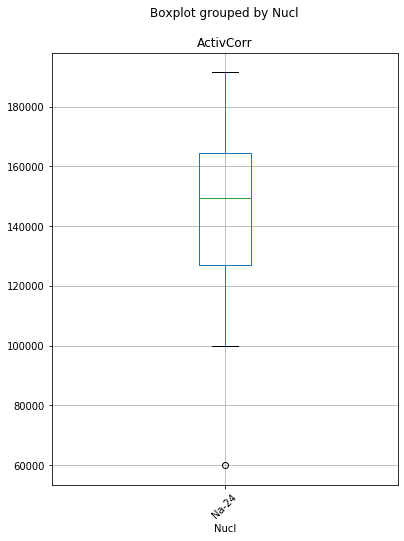

In [68]:
# 2019-11-22 Soh a partir de 2014
df4 = dfAct2[(dfAct2['Nucl']=='Na-24')&(dfAct2['StTime']>='2014-1-1')&(dfAct2['ActivCorr']<=200000)&(dfAct2['ActivCorr']>=50000)]
bp4 = df4.boxplot(column='ActivCorr',by='Nucl',rot=45,figsize=(6,8))
bp4
fig4 = bp4.get_figure()
fig4.savefig('fig4.png')

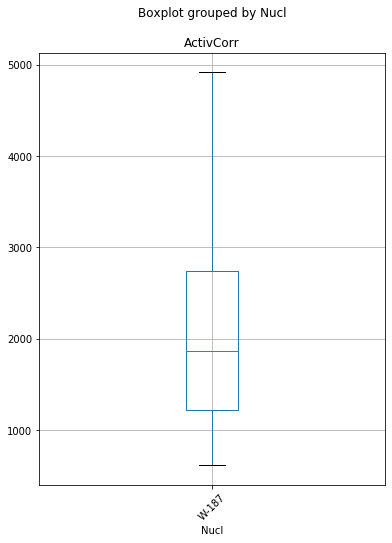

In [69]:
# 2019-11-22 Soh a partir de 2014
df5 = dfAct2[(dfAct2['Nucl']=='W-187')&(dfAct2['StTime']>='2014-1-1')&(dfAct2['ActivCorr']<=5000)&(dfAct2['ActivCorr']>=500)]
bp5 = df5.boxplot(column='ActivCorr',by='Nucl',rot=45,figsize=(6,8))
bp5
fig5 = bp5.get_figure()
fig5.savefig('fig5.png')

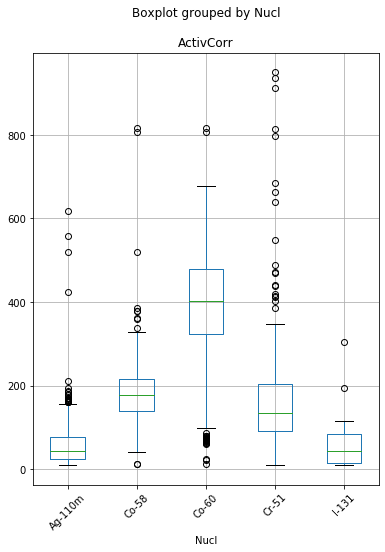

In [70]:
# 2019-11-22 Soh a partir de 2014
df6 = dfAct2[dfAct2['Nucl'].isin({'Co-58','Co-60','Cr-51','Ag-110m','I-131'})&
              (dfAct2['StTime']>='2014-1-1')&(dfAct2['ActivCorr']<=1000)&(dfAct2['ActivCorr']>=10)]
bp6 = df6.boxplot(column='ActivCorr',by='Nucl',rot=45,figsize=(6,8))
bp6
fig6 = bp6.get_figure()
fig6.savefig('fig6.png')

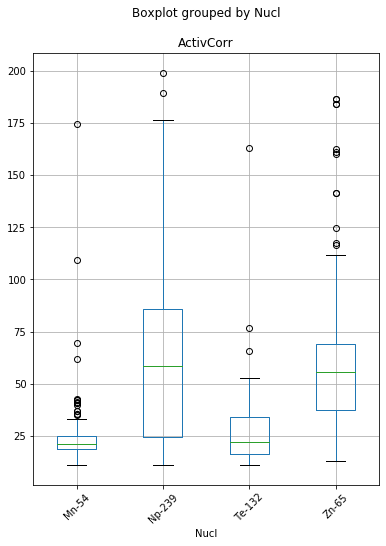

In [71]:
# 2019-11-22 Soh a partir de 2014
df7 = dfAct2[dfAct2['Nucl'].isin({'Mn-54','Np-239','Te-132','Zn-65'})&
              (dfAct2['StTime']>='2014-1-1')&(dfAct2['ActivCorr']<=200)&(dfAct2['ActivCorr']>=10)]
bp7 = df7.boxplot(column='ActivCorr',by='Nucl',rot=45,figsize=(6,8))
bp7
fig7 = bp7.get_figure()
fig7.savefig('fig7.png')

In [72]:
# Ag-110m, Co-58, Co-60, Cr-51, I-131, Mn-54, Na-24, Np-239, Te-132, W-187 e Zn-65

In [73]:
dfTakeTimes

,IdSpec,FName,StTime,LvTime,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,IdComm,Nucl,Engy,sEngy,Yie,sYie,IdEngy,T12s
0,0,../Genie_Transfer/Si/BGNOVO.Chn,2013-12-13 15:27:02,237389.66,58,0,7.371753,211.509135,61.272868,685.830776,True,W-187,685.73,0.040,27.300,1.000,46,85390.0
1,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,298,6,2.287785,355.647626,115.996257,479.336837,True,W-187,479.55,0.022,21.800,0.800,44,85390.0
2,6,../Genie_Transfer/Si/si2016/SI01516.Chn,2016-01-29 15:29:51,50000.00,305,6,2.469356,481.507002,100.607261,685.943159,True,W-187,685.73,0.040,27.300,1.000,46,85390.0
3,20,../Genie_Transfer/Si/si2016/SI02716.Chn,2016-03-04 15:51:57,50000.00,961,20,3.014066,317.200394,112.966364,685.717094,True,W-187,685.73,0.040,27.300,1.000,46,85390.0
4,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,996,21,2.287785,5070.859827,161.439865,479.765845,True,W-187,479.55,0.022,21.800,0.800,44,85390.0
5,21,../Genie_Transfer/Si/si2016/SI04516.Chn,2016-03-16 19:15:27,48022.60,998,21,2.832496,1304.837927,137.685445,618.139526,True,W-187,618.26,0.040,6.280,0.220,45,85390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,58866,1095,2.832496,71654.337344,276.569590,1368.557863,True,Na-24,1368.55,0.040,100.000,0.001,35,54070.0
12028,1095,../Genie_Transfer/Si/Si2006/SI12306.Chn,2006-09-08 01:04:12,50000.00,58893,1095,3.740347,38731.414279,197.841228,2754.012475,True,Na-24,2754.05,0.080,99.944,0.004,36,54070.0
12029,1096,../Genie_Transfer/Si/Si2006/SI07906.Chn,2006-06-05 15:26:05,50000.00,58935,1096,2.832496,58022.452623,251.475303,1368.783814,True,Na-24,1368.55,0.040,100.000,0.001,35,54070.0


In [74]:
yr2004 = pd.to_datetime('2004-01-01')
dfPlotCentrSeries = pd.merge(dfTakeTimes, dfMergePeaks, on='IdPeak') \
    [['IdPeak','IdSpec','StTime','fitEngy_x','Centr','Area_x']]
dfPlotCentrSeries = dfPlotCentrSeries[(dfPlotCentrSeries['StTime'] >= yr2004)]
dfPlotCentrSeries

,IdPeak,IdSpec,StTime,fitEngy_x,Centr,Area_x
0,58,0,2013-12-13 15:27:02,685.830776,787.909366,211.509135
1,298,6,2016-01-29 15:29:51,479.336837,543.004799,355.647626
2,305,6,2016-01-29 15:29:51,685.943159,772.920531,481.507002
3,961,20,2016-03-04 15:51:57,685.717094,776.016095,317.200394
4,996,21,2016-03-16 19:15:27,479.765845,540.856119,5070.859827
5,998,21,2016-03-16 19:15:27,618.139526,694.933286,1304.837927
...,...,...,...,...,...,...
12023,58866,1095,2006-09-08 01:04:12,1368.557863,1559.061309,71654.337344
12024,58893,1095,2006-09-08 01:04:12,2754.012475,3130.851799,38731.414279
12025,58935,1096,2006-06-05 15:26:05,1368.783814,1558.100299,58022.452623


In [75]:
dfPlot1332 = dfPlotCentrSeries.loc[np.abs(dfPlotCentrSeries['fitEngy_x']-1332.5)<0.6]
dfPlot1332

,IdPeak,IdSpec,StTime,fitEngy_x,Centr,Area_x
7350,85,1,2016-12-21 15:33:47,1332.523368,1488.387744,32363.849573
7352,189,3,2016-12-08 19:32:14,1332.694790,1487.641524,36888.294792
7354,234,4,2016-07-26 15:21:10,1332.559172,1488.080844,49198.113001
7356,275,5,2016-07-19 23:21:01,1332.607905,1487.933455,34585.649725
7358,314,6,2016-01-29 15:29:51,1332.591479,1492.617952,28521.606980
7360,396,8,2016-11-08 18:13:20,1332.603163,1490.279136,41054.436716
...,...,...,...,...,...,...
8765,58279,1084,2007-04-16 18:27:16,1332.500000,1505.075038,533.433570
8767,58531,1089,2006-02-21 14:12:58,1332.361905,1515.037702,2267.378924
8771,58792,1094,2006-09-04 16:19:13,1332.524721,1516.760059,2821.082139


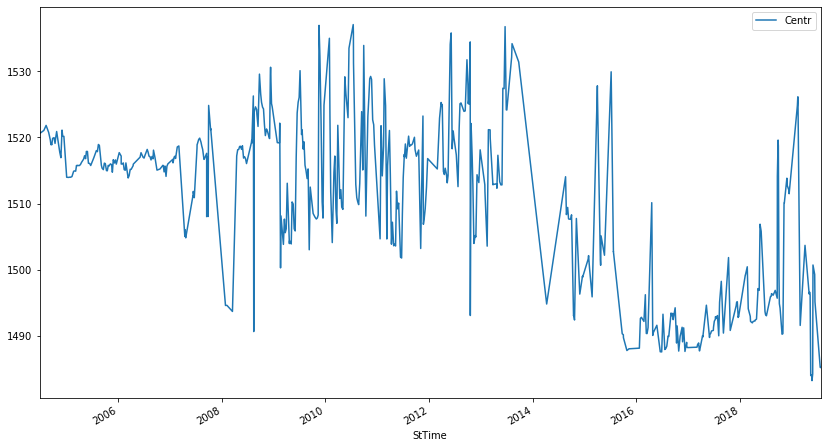

In [76]:
dfPlot1332.plot(x='StTime',y='Centr',figsize=(14,8))

In [77]:
dfPlot1173 = dfPlotCentrSeries.loc[np.abs(dfPlotCentrSeries['fitEngy_x']-1173.24)<0.6]                      
dfPlot1173 = dfPlot1173[(dfPlot1173['StTime'] >= yr1990) & (dfPlot1173['Centr'] >= 1290)]
dfPlot1173

,IdPeak,IdSpec,StTime,fitEngy_x,Centr,Area_x
7349,84,1,2016-12-21 15:33:47,1173.196603,1310.987495,34687.924145
7351,188,3,2016-12-08 19:32:14,1173.303305,1310.224828,45866.523534
7353,233,4,2016-07-26 15:21:10,1173.247987,1310.724369,51306.654627
7355,274,5,2016-07-19 23:21:01,1173.280825,1310.574082,35955.015783
7357,313,6,2016-01-29 15:29:51,1173.202770,1315.210551,36077.887185
7359,395,8,2016-11-08 18:13:20,1173.228906,1312.908932,43349.737659
...,...,...,...,...,...,...
8768,58595,1090,2006-05-22 15:01:58,1173.455868,1335.898711,3004.252947
8769,58655,1091,2006-05-02 18:03:32,1173.484797,1336.914512,2324.945997
8770,58790,1094,2006-09-04 16:19:13,1173.155168,1335.909264,2965.048635


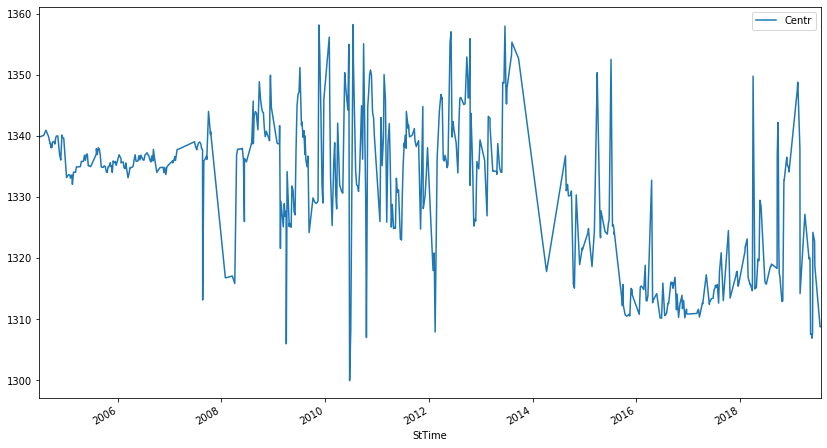

In [78]:
dfPlot1173.plot(x='StTime',y='Centr',figsize=(14,8))

In [79]:
dfPlot0320 = dfPlotCentrSeries.loc[np.abs(dfPlotCentrSeries['fitEngy_x'] - 320.08)<0.6]                      
dfPlot0320 = dfPlot0320[dfPlot0320['StTime'] >= yr1990]
dfPlot0320

,IdPeak,IdSpec,StTime,fitEngy_x,Centr,Area_x
1501,69,1,2016-12-21 15:33:47,320.073750,361.055070,4896.258280
1502,170,3,2016-12-08 19:32:14,320.109407,360.802961,3761.646920
1503,215,4,2016-07-26 15:21:10,320.118885,360.989336,5711.683177
1504,253,5,2016-07-19 23:21:01,320.098953,360.878320,4052.259811
1505,294,6,2016-01-29 15:29:51,320.117107,365.831751,3308.743257
1506,378,8,2016-11-08 18:13:20,320.136210,363.684785,5980.840074
...,...,...,...,...,...,...
2266,58251,1084,2007-04-16 18:27:16,320.080000,381.032749,228.226064
2267,58506,1089,2006-02-21 14:12:58,320.083631,365.941225,3281.922185
2268,58766,1094,2006-09-04 16:19:13,320.055342,367.849284,5033.601418


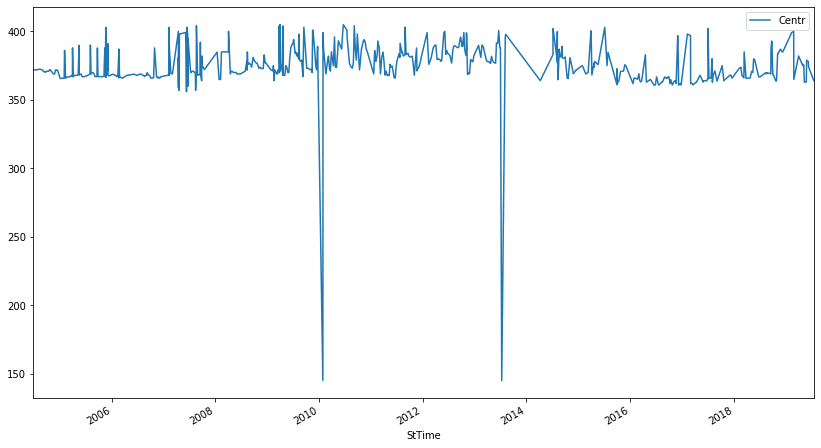

In [80]:
dfPlot0320.plot(x='StTime',y='Centr',figsize=(14,8))

In [81]:
# ****** PAREY AKI 2019-11-24
# - Tirei os espectros com datas de aquisi,c~ao esp'urias
# - Selecionar s'o espectros com Co-60. Verificar se as 2 linhas gama s~ao consistentes,
#   em rela'c~ao aos canais e `as 'areas dos picos.
# - Ver tamb'em os com Cr-51.

In [82]:
df2pksCo60 = pd.merge(dfPlot1173, dfPlot1332, on='IdSpec')
df2pksCo60['chanDistLinesCo60'] = df2pksCo60['Centr_y'] - df2pksCo60['Centr_x']
df2pksCo60['ratioAreasLinesCo60'] = df2pksCo60['Area_x_x'] / df2pksCo60['Area_x_y']
df2pksCo60

,IdPeak_x,IdSpec,StTime_x,fitEngy_x_x,Centr_x,Area_x_x,IdPeak_y,StTime_y,fitEngy_x_y,Centr_y,Area_x_y,chanDistLinesCo60,ratioAreasLinesCo60
0,84,1,2016-12-21 15:33:47,1173.196603,1310.987495,34687.924145,85,2016-12-21 15:33:47,1332.523368,1488.387744,32363.849573,177.400249,1.071811
1,188,3,2016-12-08 19:32:14,1173.303305,1310.224828,45866.523534,189,2016-12-08 19:32:14,1332.694790,1487.641524,36888.294792,177.416696,1.243390
2,233,4,2016-07-26 15:21:10,1173.247987,1310.724369,51306.654627,234,2016-07-26 15:21:10,1332.559172,1488.080844,49198.113001,177.356475,1.042858
3,274,5,2016-07-19 23:21:01,1173.280825,1310.574082,35955.015783,275,2016-07-19 23:21:01,1332.607905,1487.933455,34585.649725,177.359374,1.039593
4,313,6,2016-01-29 15:29:51,1173.202770,1315.210551,36077.887185,314,2016-01-29 15:29:51,1332.591479,1492.617952,28521.606980,177.407401,1.264932
5,395,8,2016-11-08 18:13:20,1173.228906,1312.908932,43349.737659,396,2016-11-08 18:13:20,1332.603163,1490.279136,41054.436716,177.370204,1.055909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,58217,1083,2006-01-09 15:21:33,1173.219817,1336.902317,3683.419079,58219,2006-01-09 15:21:33,1332.529460,1517.696055,3166.289900,180.793738,1.163323
662,58529,1089,2006-02-21 14:12:58,1173.424522,1334.637146,2231.030407,58531,2006-02-21 14:12:58,1332.361905,1515.037702,2267.378924,180.400556,0.983969
663,58790,1094,2006-09-04 16:19:13,1173.155168,1335.909264,2965.048635,58792,2006-09-04 16:19:13,1332.524721,1516.760059,2821.082139,180.850795,1.051032


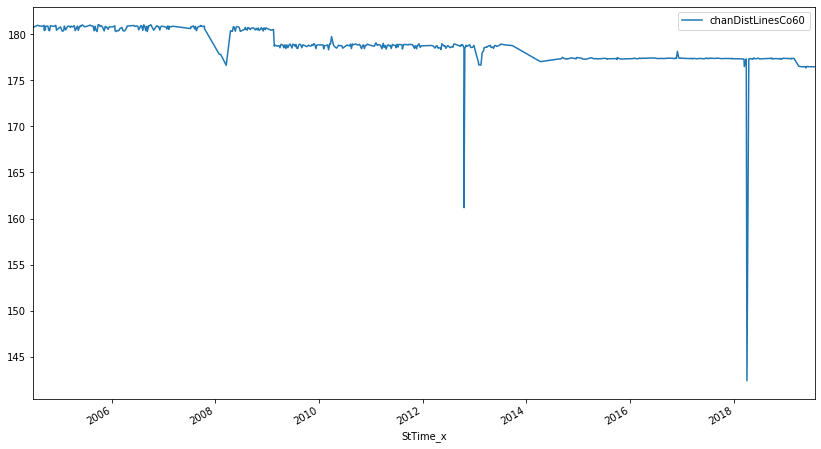

In [83]:
df2pksCo60.plot(x='StTime_x',y='chanDistLinesCo60',figsize=(14,8))

In [84]:
# H'a algum problema na calib canal x energia nos seguintes espectros:
df2pksCo60[df2pksCo60['chanDistLinesCo60']<170]

,IdPeak_x,IdSpec,StTime_x,fitEngy_x_x,Centr_x,Area_x_x,IdPeak_y,StTime_y,fitEngy_x_y,Centr_y,Area_x_y,chanDistLinesCo60,ratioAreasLinesCo60
338,29531,515,2012-10-18 09:30:08,1173.24,1331.893546,522.978467,29534,2012-10-18 09:30:08,1332.5,1493.075124,4706.547164,161.181578,0.111117
566,50599,935,2018-04-03 14:26:44,1173.24,1349.777120,778.400272,50601,2018-04-03 14:26:44,1332.5,1492.178694,142.854988,142.401574,5.448884


In [85]:
df2pksCo60 = df2pksCo60[df2pksCo60['chanDistLinesCo60']>=170.0]
df2pksCo60

,IdPeak_x,IdSpec,StTime_x,fitEngy_x_x,Centr_x,Area_x_x,IdPeak_y,StTime_y,fitEngy_x_y,Centr_y,Area_x_y,chanDistLinesCo60,ratioAreasLinesCo60
0,84,1,2016-12-21 15:33:47,1173.196603,1310.987495,34687.924145,85,2016-12-21 15:33:47,1332.523368,1488.387744,32363.849573,177.400249,1.071811
1,188,3,2016-12-08 19:32:14,1173.303305,1310.224828,45866.523534,189,2016-12-08 19:32:14,1332.694790,1487.641524,36888.294792,177.416696,1.243390
2,233,4,2016-07-26 15:21:10,1173.247987,1310.724369,51306.654627,234,2016-07-26 15:21:10,1332.559172,1488.080844,49198.113001,177.356475,1.042858
3,274,5,2016-07-19 23:21:01,1173.280825,1310.574082,35955.015783,275,2016-07-19 23:21:01,1332.607905,1487.933455,34585.649725,177.359374,1.039593
4,313,6,2016-01-29 15:29:51,1173.202770,1315.210551,36077.887185,314,2016-01-29 15:29:51,1332.591479,1492.617952,28521.606980,177.407401,1.264932
5,395,8,2016-11-08 18:13:20,1173.228906,1312.908932,43349.737659,396,2016-11-08 18:13:20,1332.603163,1490.279136,41054.436716,177.370204,1.055909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,58217,1083,2006-01-09 15:21:33,1173.219817,1336.902317,3683.419079,58219,2006-01-09 15:21:33,1332.529460,1517.696055,3166.289900,180.793738,1.163323
662,58529,1089,2006-02-21 14:12:58,1173.424522,1334.637146,2231.030407,58531,2006-02-21 14:12:58,1332.361905,1515.037702,2267.378924,180.400556,0.983969
663,58790,1094,2006-09-04 16:19:13,1173.155168,1335.909264,2965.048635,58792,2006-09-04 16:19:13,1332.524721,1516.760059,2821.082139,180.850795,1.051032


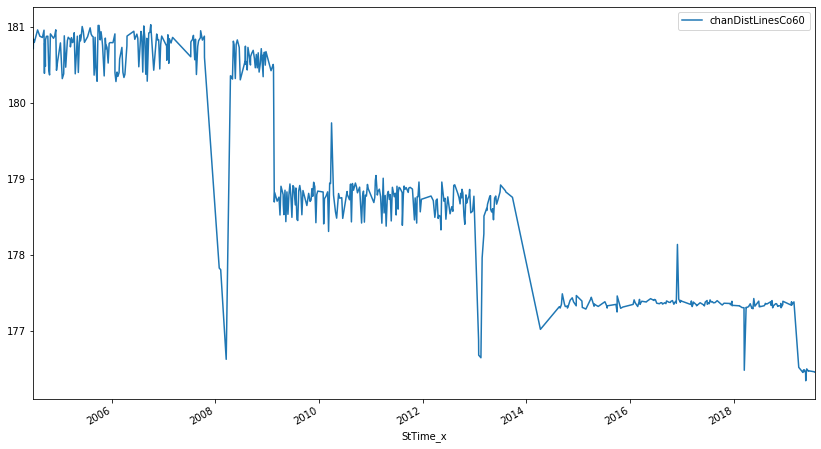

In [86]:
df2pksCo60.plot(x='StTime_x',y='chanDistLinesCo60',figsize=(14,8))

In [87]:
# 2019-11-24 Muito bom! Deu para ver a dist^ancia em canais entre os picos do Co-60
# em 665 espectros entre 2004 e 2019!

# Agora vamos ver a relacao entre as areas dos picos:
# E as areas propriamente do 1173

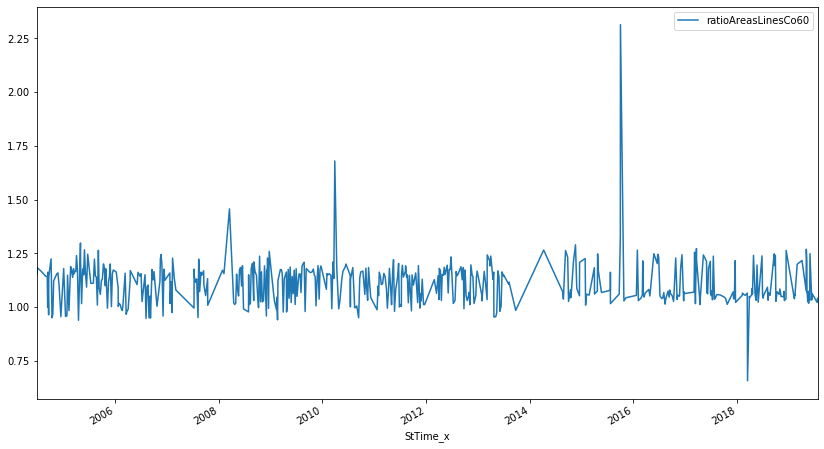

In [88]:
df2pksCo60.plot(x='StTime_x',y='ratioAreasLinesCo60',figsize=(14,8))

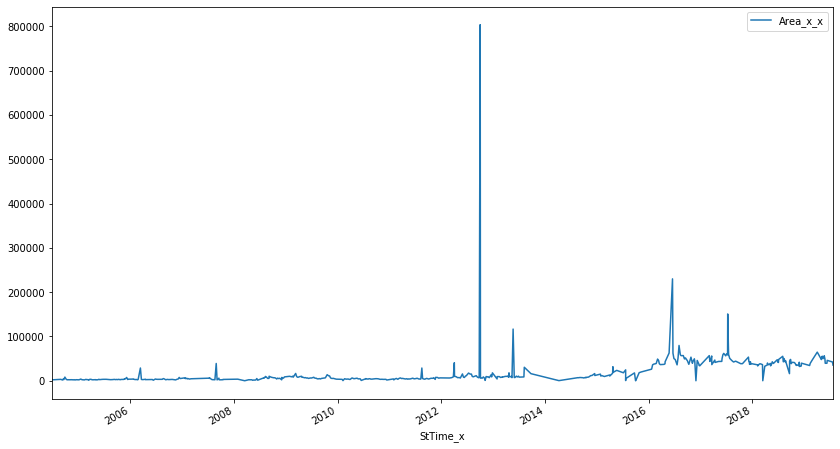

In [89]:
df2pksCo60.plot(x='StTime_x',y='Area_x_x',figsize=(14,8))

In [90]:
dfActivs.describe()

,IdSpec,LvTime,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,Engy,sEngy,Yie,sYie,IdEngy,T12s,EfficOnEngy,DecayInAcquis,Activ,Espera
count,12029.000000,12029.000000,12029.000000,12029.000000,12029.000000,1.202900e+04,12029.000000,12029.000000,12029.000000,12029.000000,12029.000000,12029.000000,12029.000000,1.202900e+04,12029.000000,12029.000000,12029.000000,12029
mean,532.227949,48199.457282,29249.542273,532.227949,2.798156,6.694165e+03,133.281761,873.502424,873.473437,0.016465,56.318880,0.300137,25.692992,2.902013e+07,0.004563,1.072024,322.866351,4 days 19:06:45.375426
std,313.444519,11918.045759,16897.926945,313.444519,0.815249,2.550112e+04,71.659850,567.858956,567.866413,0.021487,39.473515,0.426525,13.760588,6.729609e+07,0.003047,0.111382,9392.359486,1 days 23:14:15.222392
min,0.000000,184.680000,58.000000,0.000000,2.106215,2.791033e+01,9.197113,105.535500,106.123000,0.001000,0.518000,0.001000,0.000000,5.407000e+04,0.001278,1.000000,0.224768,0 days 11:29:38
25%,263.000000,50000.000000,14854.000000,263.000000,2.287785,8.229882e+02,95.040164,479.550817,479.550000,0.003000,13.040000,0.017000,17.000000,1.450000e+05,0.002301,1.000803,16.216105,4 days 14:59:12
50%,520.000000,50000.000000,29775.000000,520.000000,2.650926,2.305622e+03,123.678992,772.786597,772.890000,0.005000,72.700000,0.120000,24.000000,3.392000e+06,0.003176,1.005117,45.709178,5 days 04:41:45
75%,796.000000,50000.000000,44040.000000,796.000000,3.014066,5.447468e+03,166.425549,1173.235448,1173.237000,0.022000,99.448000,0.400000,38.000000,2.158000e+07,0.005587,1.124264,109.858635,6 days 01:53:39
max,1097.000000,237389.660000,59039.000000,1097.000000,7.371753,1.601024e+06,1566.941165,2754.640881,2754.050000,0.080000,100.000000,3.000000,48.000000,9.467000e+08,0.012020,2.777791,679717.990916,7 days 06:53:22


In [91]:
# 2019-11-21 Usando espectro bom para teste: SI00319.chn (coleta 6/2/19)
# dataframe que contehm os nomes dos arquivos
dfActivs.loc[dfActivs.FName=='..\Genie_Transfer\Si\SI2019\si00319.Chn']

,IdSpec,FName,StTime,LvTime,IdPeak,IdSpec_2,Fwhm,Area,SArea,fitEngy,...,sEngy,Yie,sYie,IdEngy,T12s,EfficOnEngy,DecayInAcquis,Activ,DesligTime,Espera


In [92]:
# 2019-11-21 Usando espectro bom para teste: SI00319.chn (coleta 6/2/19)
dfFoundPeaks.loc[dfFoundPeaks.IdSpec==1072]

AttributeError: 'DataFrame' object has no attribute 'IdSpec'

In [ ]:
# Atencao USAR ESTE PARA TESTES
# 2019-11-21 Usando espectro bom para teste: SI00319.chn (coleta 6/2/19)
dfSI00319 = dfAct2.loc[dfAct2.IdSpec==1072]
dfSI00319

In [ ]:
dfFoundPeaks.loc[dfFoundPeaks.IdSpec==1072]

In [ ]:
# 2019-11-23 C'elulas tiradas do P.P. e deixadas no final para testes

In [ ]:
dfTest1 = pd.DataFrame({'Animal': ['Falcon', 'Falcon', 'Parrot', 'Parrot', 'Parrot'],
                       'Max Speed': [380., 370., 24., 26., 25.3],
                       'Area': [123., 45678., 91000., 1112., 1314.],
                       'IdGamma': ['gaA', 'gaB', 'gaC', 'gaC', 'gaD'],
                       })
dfTest1

In [ ]:
dfTest1.groupby(['Animal','IdGamma']).max()

In [ ]:
dfTest1.groupby(['Animal','IdGamma']).max().Area

In [ ]:
dfTest1.groupby(['Animal','IdGamma']).max().idxmin()

In [ ]:
dfTest1.groupby(['Animal','IdGamma'])['Area'].idxmin()

In [ ]:
gbMaxAreaByAnimalIdGamma = dfTest1.groupby(['Animal','IdGamma'])['Area'].idxmax()
gbMaxAreaByAnimalIdGamma

In [ ]:
gbMinAreaByAnimalIdGamma = dfTest1.groupby(['Animal','IdGamma'])['Area'].idxmin()
gbMinAreaByAnimalIdGamma

In [ ]:
dfTest1.loc[gbMaxAreaByAnimalIdGamma]

In [ ]:
dfTest1.loc[gbMinAreaByAnimalIdGamma]

In [ ]:
# 2019-11-23 Finalmente, a forma mais compacta:
dfSelected = dfTest1.loc[dfTest1.groupby(['Animal','IdGamma'])['Area'].idxmax()]
dfSelected